In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
from keras.models import Model
from tensorflow import keras
import pandas as pd
from os import walk, listdir
import os 

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [2]:
categories = pd.read_csv("category_mapping.csv", sep=";")

In [3]:
categories["ID_str"] = categories["ID"].apply(lambda x: str(x).zfill(3))

In [4]:
categories_to_ID = dict(zip(categories["ID_str"],categories["Name"]))

In [5]:
data_path = "./data/train_one_frame"
output_path = "./data/train_one_frame_predict/"
video_categories = listdir(data_path)
image_files = []
for category in video_categories:
    category_path = data_path+"/"+category
    image_files_category = listdir(category_path)
    image_files = image_files+image_files_category

In [6]:
len(video_categories)

64

In [7]:
dataset = pd.DataFrame()

In [8]:
dataset["frames_files"] = image_files

In [9]:
dataset["category_ID"] = dataset["frames_files"].apply(lambda x: x[:3])

In [10]:
dataset["category_name"] = dataset["category_ID"].apply(lambda x: categories_to_ID[x])

In [11]:
dataset["person_ID"] = dataset["frames_files"].apply(lambda x: x[4:7])
dataset["person_ID"] = dataset["frames_files"].apply(lambda x: x[4:7])

In [12]:
dataset["video_ID"] = dataset["frames_files"].apply(lambda x: x[:11])

In [13]:
dataset["video_path"] = data_path+"/"+dataset["category_ID"]+"/"+dataset["frames_files"]

In [14]:
#dataset["frame_ID"] = dataset["frames_files"].apply(lambda x: int(x.split("frame_")[1].split(".")[0]))

In [15]:
#MAX_SEQ_LENGTH = dataset["frame_ID"].max()+1
#print(MAX_SEQ_LENGTH)

# Predict 

In [16]:
MODEL_PATH = "./trained_models/signs_model_efficientnetv2-s_v5"


In [17]:
def load_model(model_path):
    model_keras = tf.keras.models.load_model(model_path)
    return model_keras


In [18]:
model = load_model(MODEL_PATH)


In [19]:
width = 384
height = 384

In [20]:
dataset_tf = tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=(width, height))

Found 3120 files belonging to 64 classes.


In [21]:
dataset_predictions = model.predict(dataset_tf) 

In [22]:
dataset_predictions.shape

(3120, 64)

In [37]:
predictions_class = np.argmax(dataset_predictions, axis =1)

In [38]:
dataset["category_ID"].astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
3115    64
3116    64
3117    64
3118    64
3119    64
Name: category_ID, Length: 3120, dtype: int32

(array([ 119.,   27.,   89.,   90.,   33.,   93.,  147.,  501., 1999.,
          22.]),
 array([ 1. ,  6.8, 12.6, 18.4, 24.2, 30. , 35.8, 41.6, 47.4, 53.2, 59. ]),
 <BarContainer object of 10 artists>)

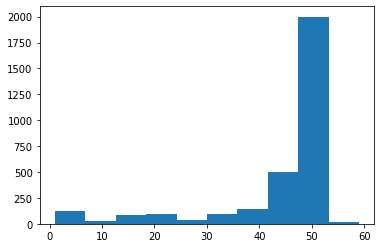

In [39]:
plt.hist(predictions_class)

In [26]:
y_true = dataset["category_ID"].astype(int).values
y_pred =  predictions_class
# Confusion matrix for actual and predicted values.
cm = confusion_matrix(y_true, y_pred)

In [27]:
data_path = "./data/train_one_frame"

train_labels = []
video_categories = listdir(data_path)
for category in video_categories:
    category_path = data_path+"/"+category
    images_files = listdir(category_path)
    for image in images_files:
        image_path = category_path+"/"+image
        train_labels.append(category)

In [28]:
CLASSES = list(set(train_labels))


In [29]:
accuracy_score(y_true, y_pred)

0.014743589743589743

In [30]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm)

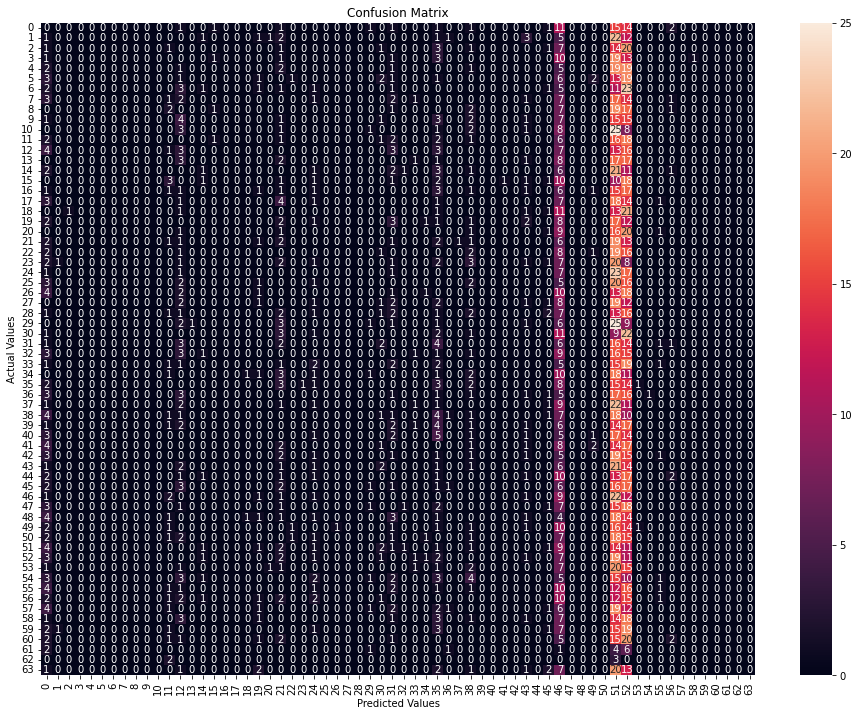

In [31]:
#Plotting the confusion matrix
plt.figure(figsize=(16,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
